Using the Enron files, analyze the the Top 15 users inbox data to find the sentiment of the emails using NLTK.

In [4]:
import os
from email.parser import Parser
import email.utils
import time
import datetime
from dateutil.parser import parse
import email
import re
import glob

try:
    os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/') # making changes to cwd for local reference
except:
    pass

raw_inbox_data=[]
clean_inbox_data=[]

top_users = open("midterm\\data\\Question1\\HighActivity_Users.txt").read()
username=top_users.split('\n')

file_list = glob.glob("midterm\\data\\enron\\maildir\\*")  # use glob to read all the folders to extract mails
for filename in file_list:
    if os.path.basename(filename) in username:
        for x in os.listdir(filename):
            if (x=='inbox')or(x=='notes_inbox'):          # read the content of all inbox items and process raw data
                for y in os.listdir(filename+'/'+x):
                    ab_path=filename+'/'+x+'/'+y
                    try:
                        f = open(ab_path, "r")
                        string_data = f.read()
                        email = Parser().parsestr(string_data)
                        raw_inbox_data.append(email.get_payload()) 
                    except Exception:
                        pass        
                    

In [5]:
# Clean the data using regex and remove stop words using NLTK
# Lemmatize the word tokens and process raw data for analysis

import re
import nltk
regex = re.compile("[^a-zA-Z\s]")

clean_inbox_data = []
for x in raw_inbox_data:
    clean_inbox_data.append(regex.sub('', x.lower()))   
        
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words("english"))
fin_inbox = ''.join(clean_inbox_data)

tokens = nltk.word_tokenize(fin_inbox)  
wnl = nltk.WordNetLemmatizer()
lem_inbox = [wnl.lemmatize(t) for t in tokens]

lem_inbox_clean=[]
for x in lem_inbox:
    lem_inbox_clean.append(regex.sub('', x))   

lem_inbox_clean2 = [x for x in lem_inbox_clean if x]
filtered_inbox = [w for w in lem_inbox_clean2 if not w in stop_words]
    

In [6]:
# Use Custom made Positive & Negative Word Dictionary

neg_sent = open("midterm\\data\\Question1\\negative.txt").read()
negative_words=neg_sent.split('\n')

pos_sent = open("midterm\\data\\Question1\\positive.txt").read()
positive_words=pos_sent.split('\n')


In [7]:
# Make a dictionary of the filtered corpus 

dict_filtered_inbox = {}

for word in filtered_inbox:
    if word not in dict_filtered_inbox:
        dict_filtered_inbox[word] = 1
    else: dict_filtered_inbox[word]+=1
    
dict_filtered_inbox_words = [v[0] for v in sorted(dict_filtered_inbox.items(), key=lambda x:x[1],reverse=True)]
                             

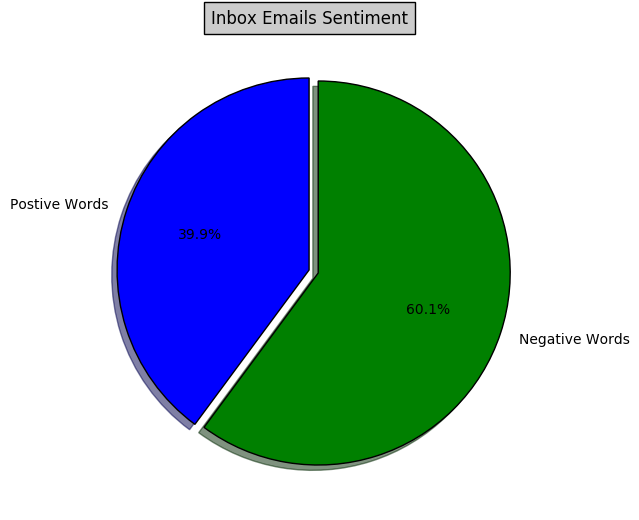

In [8]:
# Sentiment Analysis

positive_counter=0
negative_counter=0

for word in dict_filtered_inbox_words:
    if word in positive_words:
        positive_counter=positive_counter+1
    elif word in negative_words:
        negative_counter=negative_counter+1
        
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Postive Words', 'Negative Words'
fracs = [positive_counter, negative_counter]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
               
title('Inbox Emails Sentiment', bbox={'facecolor':'0.8', 'pad':5})
show()
